In [536]:
###############
## Problem 4 ##
###############

import os
import warnings
import numpy as np
from astropy.io import fits

# The warning, I could not delete, so hided
warnings.filterwarnings('ignore', category=UserWarning, module='astropy')
folders = ["dark", "flats", "science"]
folder_path = '/Users/anthony/Desktop/PS3/'

for foldername in folders:
    # build the path for each folder
    path = os.path.join(folder_path, foldername)
    print("Folder:", foldername)

    for filename in os.listdir(path):
        if filename.endswith('.fits'):
            # build the path for each file
            file_path = os.path.join(path, filename)

            print("File:", filename)

            # open each file
            with fits.open(file_path) as data:
                header = data[0].header
                print("Header:", header)
                print("Exposure Time:", header['EXPTIME'])
                
    print("\n")

Folder: dark
File: dark_10.C22.fits
Header: SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  640 / length of data axis 1                          NAXIS2  =                 2400 / length of data axis 2                          EXTEND  =                    T / FITS dataset may contain extensions            COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H DATE-SCN= '2013-09-10T23:09:19' / Date of scan start (UTC approximate)          DATE-OBS= '2013-09-10T23:09:19' / Date of observation start (UTC approximate)   OBJECT  =                      / Name of the object observed                    OBSMODE = 'stare'              / Observing mode                             

# Notes:
Dark frames are subtracted from your science frames to remove thermal noise (telescope's aperture closed) 

Flats are used to correct for non-uniform illumination and pixel-to-pixel sensitivity variations (twilight)

Science Data - actual observations (normal)

# Answer:
The first file from the Dark has same Time Exposure with Flats (10.16)

The Second file from the Dark has same Time Exposure with Science Folder (180.1)


In [537]:
###############
## Problem 5 ##
###############

# Answer:

1. Reduced illumination levels compared to daylight

2. The reduced contrast between objects and their surroundings (lower contrast)

2. Flat immages have sometimes different intrument deviations (ex. noice, broken row pixel, sky brightness)

(may be bc twilight is a transitional period, so images captured during this time may show dynamic changes)

3. The center star position is different from one in the science pictures

In [538]:
#############################
## Helper Scaling Function ##
#############################

import numpy

def asinh(inputArray, scale_min=None, scale_max=None, non_linear=2.0):
	imageData=numpy.array(inputArray, copy=True)

	if scale_min == None:
		scale_min = imageData.min()
	if scale_max == None:
		scale_max = imageData.max()
	factor = numpy.arcsinh((scale_max - scale_min)/non_linear)
	indices0 = numpy.where(imageData < scale_min)
	indices1 = numpy.where((imageData >= scale_min) & (imageData <= scale_max))
	indices2 = numpy.where(imageData > scale_max)
	imageData[indices0] = 0.0
	imageData[indices2] = 1.0
	imageData[indices1] = numpy.arcsinh((imageData[indices1] - \
	scale_min)/non_linear)/factor

	return imageData

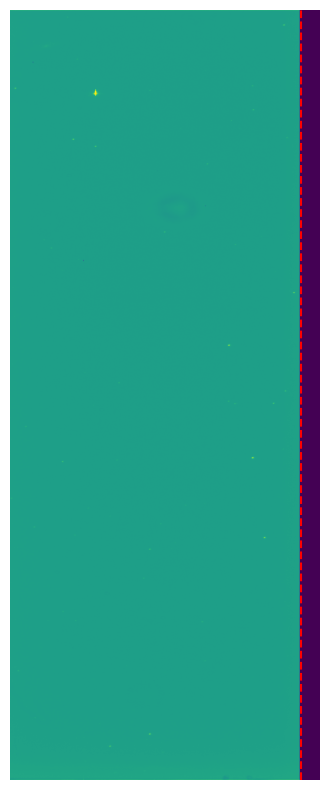

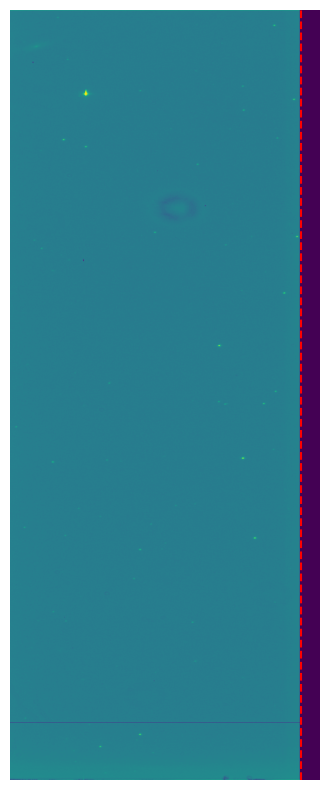

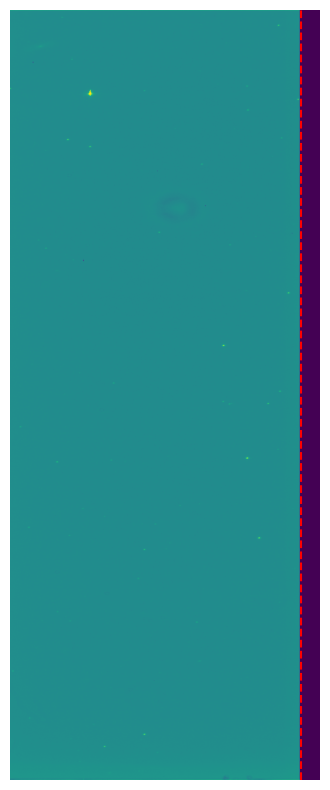

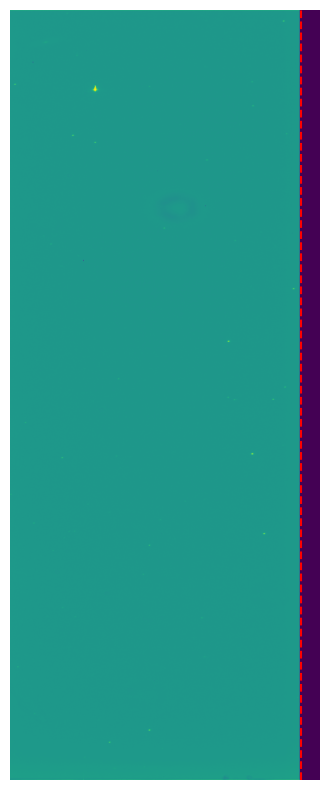

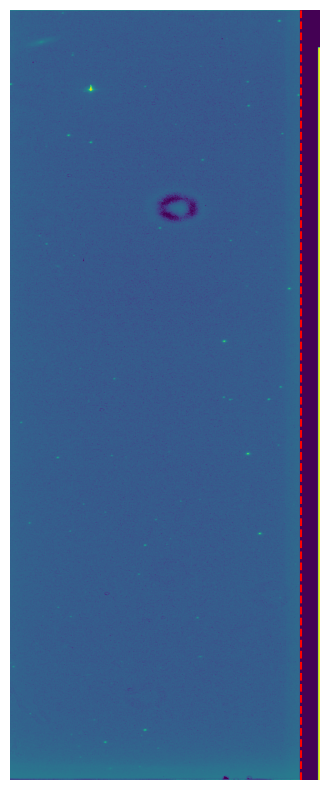

In [539]:
###############
## Problem 6 ##
###############

import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/flats'

for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)


        #########
        # ANSWER:
        with fits.open(file_path) as hdul:
            data = hdul[0].data

            plot = asinh(data, scale_min=200)

            # remove bias (after 600th column)
            bias = np.median(data[:, 600:])
            plot -= bias

            # plot
            plt.figure(figsize=(4, 10))
            plt.imshow(plot, origin='lower', aspect='auto')
            
            plt.axvline(x=600, color='red', linestyle='--')
            plt.axis('off')
            
            plt.show()
        
        hdul.close()


In [540]:
################
## Dark Image ##
################

import numpy as np
import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/dark'

all = []
for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)
        
        with fits.open(file_path) as hdul:
            data = hdul[0].data
            bias = np.median(data[:, 600:])
            reduced = data - bias
            all.append(reduced)

stacked_data = np.stack(all, axis=0)
median_dark = np.median(stacked_data, axis=0)

# ANSWER:
No. All horizontal cuts are in the same X-axis position (600px). No change in the overscan.

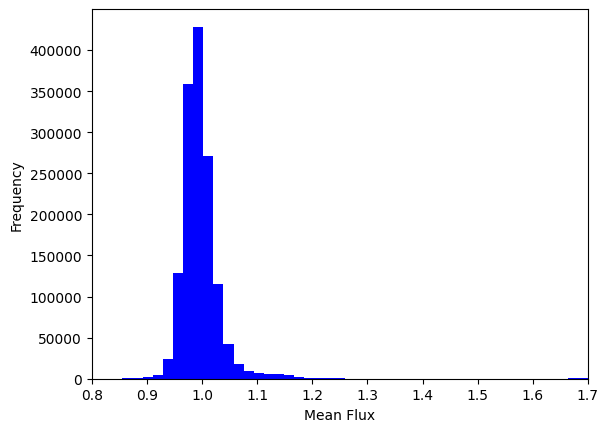

In [541]:
###############
## Problem 7 ##
###############

import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/flats'

all = []
for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)
        

        #########
        # ANSWER:
        with fits.open(file_path) as hdul:
            data = hdul[0].data

            # remove bias (after 600th column)
            bias = np.median(data[:, 600:])
            mean_flux = np.mean(data[:, :600])

            data = data - bias
            data = data - median_dark
            data_normalized = data / mean_flux
            
            all.append(data_normalized)
        
        hdul.close()


#########
# ANSWER:

# HIST for Image #1 (index 0)
plt.hist(all[0].flatten(), bins=np.linspace(0.8,1.7,50), color='b')
plt.xlim(0.8, 1.7)
plt.xlabel('Mean Flux')
plt.ylabel('Frequency')
plt.show()

# Answer:

Flat fielding is a critical in data reduction: pixel sensitivity or illumination across 

the detector, which can result from various factors such as the detector background

temperature (noice), dust on the optics, and vignetting (reduction of light 

towards the edges of the image). Normalizing the flat field ensures that

the correction applied after to the science images is accurate.

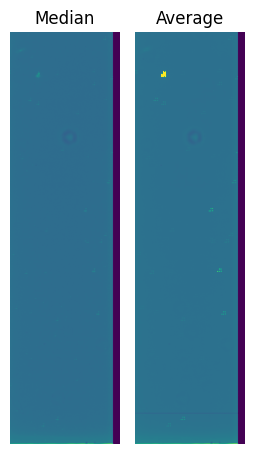

In [542]:
###############
## Problem 8 ##
###############

import numpy as np
import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/flats'

all = [] # save all pictures here
for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)
        

        #########
        # ANSWER:
        with fits.open(file_path) as hdul:
            data = hdul[0].data

            # remove bias (after 600th column)
            bias = np.median(data[:, 600:])
            mean_flux = np.mean(reduced[:, :600])

            data = data - bias
            data = data - median_dark
            data_normalized = data / mean_flux

            all.append(data_normalized)


stacked_data = np.stack(all, axis=0)
median_flats = np.median(stacked_data, axis=0) #MEDIAN
average_combined_image = np.mean(stacked_data, axis=0) #AVERAGE


# PLOT 1
plt.subplot(1, 5, 1)
plt.imshow(median_flats, vmin=0, vmax=400, origin='lower')
plt.title('Median')
plt.axis('off')

# PLOT 2
plt.subplot(1, 5, 2)
plt.imshow(average_combined_image, vmin=0, vmax=400, origin='lower')
plt.title('Average')
plt.axis('off')

plt.tight_layout()
plt.show()

# ANSWER: Compare Median and Average Methods

Median method computes the median value for each pixel across all images.

This produces a single flat field image that has been median-combined from the db.

<br>

<b>Median combine is less sensitive to outliers or extreme values in the individual images. </b>

For ex., if one of the images has a a bright star, it won't significantly affect the final combined 

image because the median is less affected by extreme values compared to the average.

<br>

# ANSWER: Image Improvements/ Differences

1. You can observe how the damaged line from picture 2 dissapear (bc all other pictures were fixed)

3. Median Method Most Accuratly and Carefully Captured Primary Deviations in the Image

/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_63445/2710977094.py:25: RuntimeWarning: divide by zero encountered in divide
  data = data / median_flats
/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_63445/2710977094.py:25: RuntimeWarning: invalid value encountered in divide
  data = data / median_flats


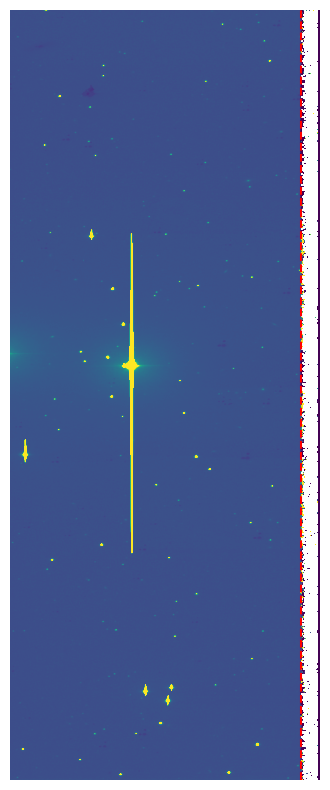

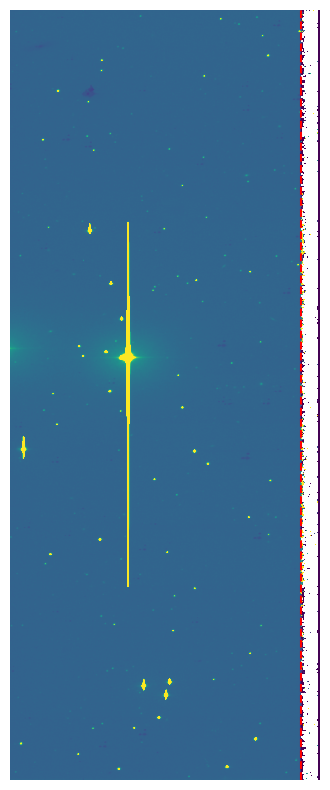

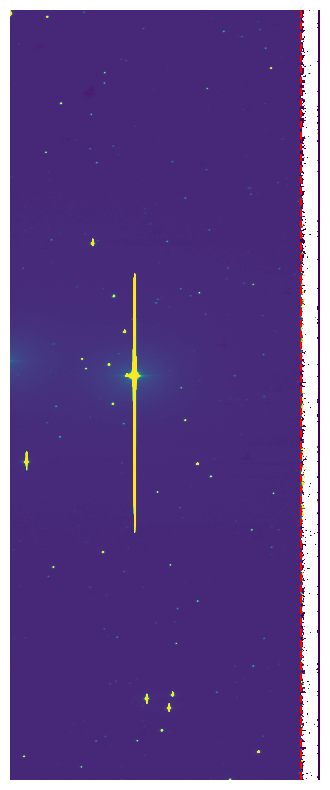

In [543]:

###############
## Problem 9 ##
###############

import numpy as np
import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/science'


for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)
        

        #########
        # ANSWER:
        with fits.open(file_path) as hdul:
            data = hdul[0].data

            bias = np.median(data[:, 600:])
            mean_flux = np.mean(reduced[:, :600])

            data = data - bias
            data = data - median_dark
            data = data / median_flats

            # plot
            plt.figure(figsize=(4, 10))
            plt.imshow(data, origin='lower', aspect='auto', vmin=0, vmax=20)
            
            plt.axvline(x=600, color='red', linestyle='--')
            plt.axis('off')
            
            plt.show()

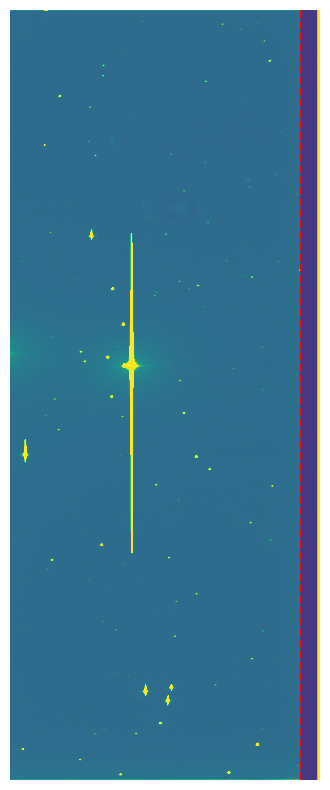

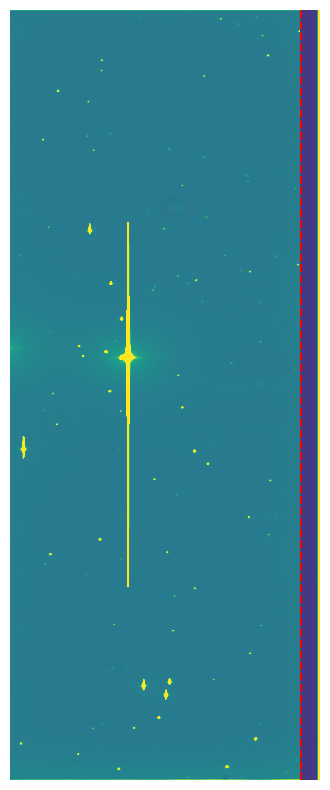

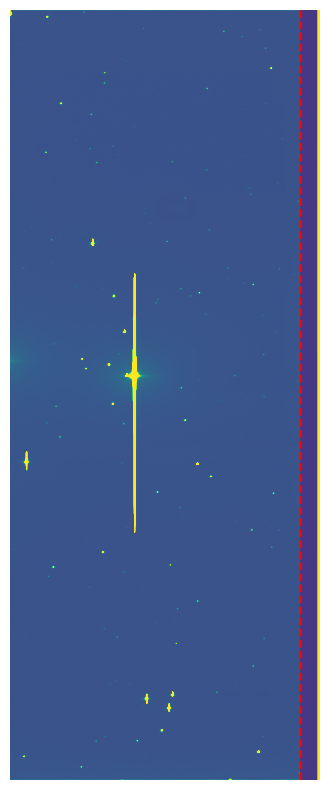

In [544]:
##############
## ORIGINAL ##

import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/science'

for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)

        with fits.open(file_path) as hdul:
            data = hdul[0].data

            plt.figure(figsize=(4, 10))
            plt.imshow(data, origin='lower', aspect='auto', vmax=4000)
            plt.axvline(x=600, color='red', linestyle='--')
            plt.axis('off')
            plt.show()

/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_63445/751657894.py:25: RuntimeWarning: divide by zero encountered in divide
  data = data / median_flats
/var/folders/26/wcqm9b0d0wbff8fjfmmh64fm0000gn/T/ipykernel_63445/751657894.py:25: RuntimeWarning: invalid value encountered in divide
  data = data / median_flats


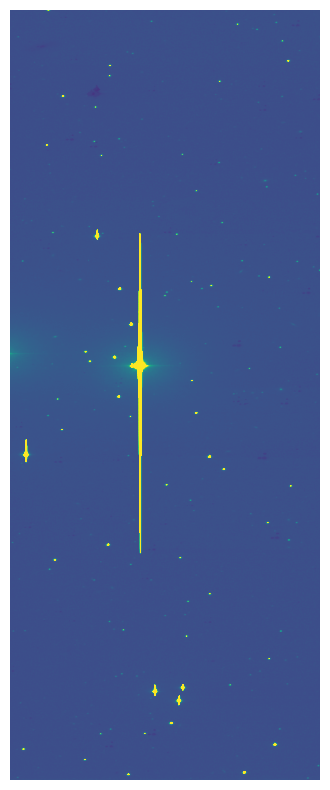

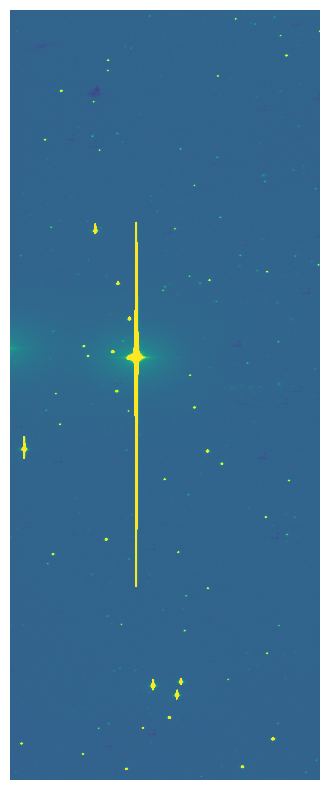

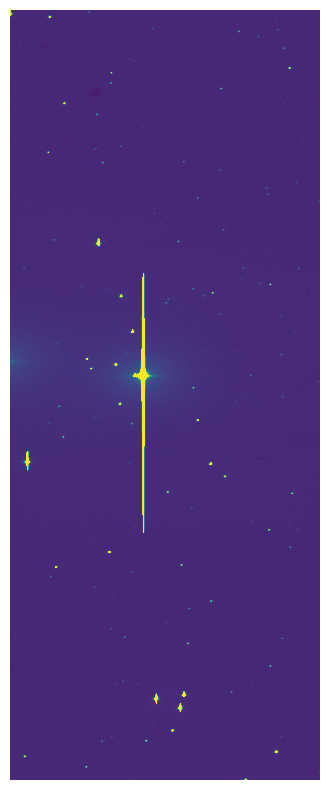

In [545]:

################
## Problem 10 ##
################

import numpy as np
import matplotlib.pyplot as plt
folder_path = '/Users/anthony/Desktop/PS3/science'

final_all = []
for filename in os.listdir(folder_path):
    if filename.endswith('.fits'):
        file_path = os.path.join(folder_path, filename)
        

        #########
        # ANSWER:
        with fits.open(file_path) as hdul:
            data = hdul[0].data

            bias = np.median(data[:, 600:])
            mean_flux = np.mean(reduced[:, :600])

            data = data - bias
            data = data - median_dark
            data = data / median_flats

            final_all.append(data)

            # plot
            plt.figure(figsize=(4, 10))
            plt.imshow(data, origin='lower', aspect='auto', vmin=0, vmax=20)
            
            # ANSWER:
            ###############
            plt.xlim(0, 597)
            ################
            plt.axis('off')
            
            plt.show()

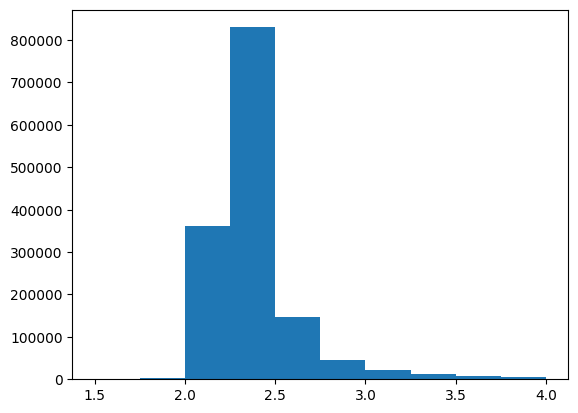

In [546]:
###############
## Find Mode ##
###############

import matplotlib.pyplot as plt

# Example Of Brightness
plt.hist(final_all[2].flatten(), bins=10, range=(1.5, 4))
plt.show()


# Most Common: 2.4

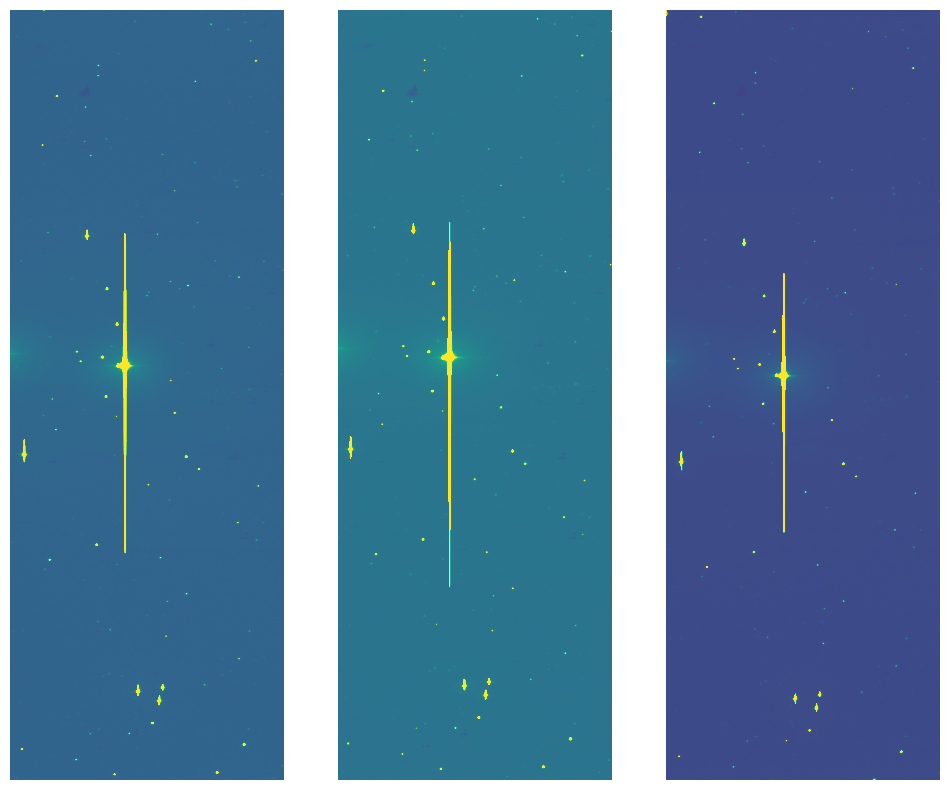

In [547]:
################
## Problem 11 ##
################

brightness = 2.4

final_all[0] = final_all[0] - brightness
final_all[1] = final_all[1] - brightness
final_all[2] = final_all[2] - brightness
plt.figure(figsize=(12, 10))

plt.subplot(131)
plt.imshow(final_all[0], origin='lower', aspect='auto', vmin=-6, vmax=20)
plt.xlim(0, 597)
plt.axis('off')

plt.subplot(132)
plt.imshow(final_all[1], origin='lower', aspect='auto', vmin=-6, vmax=20)
plt.xlim(0, 597)
plt.axis('off')

plt.subplot(133)
plt.imshow(final_all[2], origin='lower', aspect='auto', vmin=-6, vmax=20)
plt.xlim(0, 597)
plt.axis('off')

plt.show()